<a href="https://colab.research.google.com/github/pmehta2612/Fedex_EDA_Project/blob/main/Fedex_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Fedex EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

The objective of this project is to perform Exploratory Data Analysis (EDA) on FedEx's delivery history data to uncover insights related to delivery performance, freight costs, and vendor reliability. By analyzing key metrics such as delivery timelines, shipment modes, and associated logistics costs, this analysis aims to provide data-driven recommendations to improve supply chain efficiency and reduce operational delays.



# **GitHub Link -**

[Fedex Project](https://github.com/pmehta2612/Fedex_EDA_Project/blob/main/Fedex_EDA.ipynb)

# **Problem Statement**


FedEx, a global logistics and supply chain company, handles a large volume of international shipments involving multiple vendors, regions, and modes of transport. However, frequent delivery delays, high freight costs, and inconsistent vendor performance can impact customer satisfaction and operational efficiency.

The company lacks clear visibility into the patterns and causes of these issues. Without proper analysis, it becomes difficult to identify high-cost regions, inefficient vendors, or shipment modes contributing to delays. A data-driven approach is needed to evaluate logistics performance, optimize delivery operations, and reduce costs.



#### **Define Your Business Objective?**

1. **Analyze Delivery Performance-**

 * Identify the number and percentage of early, on-time, and delayed deliveries.

 * Evaluate average delivery delays by region, country, and vendor.

 * Detect trends in delivery performance over time.

2. **Understand Freight Cost Distribution-**

 * Examine freight cost variation by shipment mode, region, and weight.

 * Identify countries or vendors with consistently high shipping costs.

 * Assess correlation between freight cost, delivery delay, and shipment weight.

3. **Evaluate Vendor Reliability-**

 * Rank vendors based on delivery delay and cost metrics.

 * Highlight vendors with frequent delays or cost anomalies.

 * Support better decision-making in vendor selection.

4. **Compare Shipment Modes-**

 * Analyze which shipment modes (Air, Truck, Sea) are faster or more economical.

 * Understand trade-offs between delivery speed and freight cost across shipment modes.

5. **Provide Strategic Recommendations-**

 * Suggest regions, shipment modes, or vendors to prioritize or avoid.

 * Identify potential cost-saving opportunities in logistics operations.

 * Help FedEx improve delivery planning, reduce operational risks, and enhance customer satisfaction.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Function to load a CSV file into a pandas DataFrame
def load_csv(file_path):
    try:
        return pd.read_csv(file_path)  # Load the CSV file
    except Exception as e:
        print(f"Error: {e}")  # Print error message if loading fails
        return None  # Return None in case of failure

# Define file paths for the dfs
fedex_path = '/content/drive/MyDrive/Fedex_EDA_Project/SCMS_Delivery_History_Dataset.csv'  # File path for the fedex df
# Load the df using the load_csv function
fedex_df = load_csv(file_path=fedex_path)  # Load fedex df
# Display all columns
pd.set_option('display.max_columns', None)


Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
fedex_df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Number of Rows =",fedex_df.shape[0])
print("Number of Columns =",fedex_df.shape[1])

Number of Rows = 10324
Number of Columns = 33


### Dataset Information

In [ ]:
# Dataset Info
fedex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Are there any duplicate values in dataset =", fedex_df.duplicated().any())
print("Number of Duplicate Values =",fedex_df.duplicated().sum())

Are there any duplicate values in dataset = False
Number of Duplicate Values = 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Number of missing values in dataset =", fedex_df.isnull().sum().sum())

Number of missing values in dataset = 2383


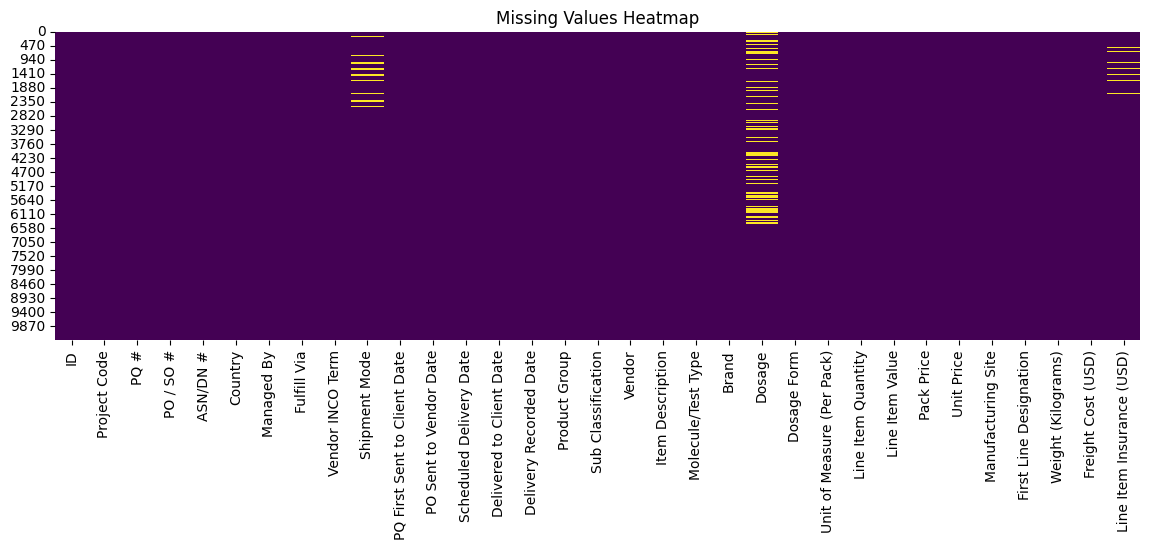

In [ ]:
# Visualizing the missing values
# Create heatmap
plt.figure(figsize=(14, 4))
sns.heatmap(fedex_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

The dataset consists of approximately 10,324 records and 33 columns of FedEx delivery transactions, with key attributes including-
* Shipment details (e.g., shipment mode, vendor, INCO terms), product information (e.g., product description, weight, unit price), delivery dates (e.g., PO sent to vendor, scheduled delivery date, actual delivery date), and financial data (e.g., freight cost, insurance cost, line item value).
* Several columns had issues such as missing values (e.g., dosage, shipment mode and line item insurance) and inconsistent formats, especially in numerical fields that were stored as strings with currency symbols and commas.
* After cleaning, I was able to create new columns like Delivery Delay (Days) and standardize text fields.
* The dataset now provides a solid foundation for analyzing delivery performance, identifying cost patterns, and evaluating vendor reliability across different regions and shipment modes.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
fedex_df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
# Dataset Describe
fedex_df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Variables Description

Here's a short description of the key variables in the dataset:

1. **PO Sent to Vendor Date:** The date when the purchase order was sent to the vendor.

2. **Weight (Kilograms):** The weight of the shipment in kilograms.

3. **Freight Cost (USD):** The cost of shipping the item in USD.

4. **Scheduled Delivery Date:** The planned date for the shipment to be delivered.

5. **Delivered to Client Date:** The actual date the shipment was delivered to the client.

6. **Delivery Delay (Days):** The difference (in days) between the scheduled delivery date and the actual delivery date (negative values indicate early delivery).

7. **Shipment Mode:** The mode of shipment (e.g., Air, Truck, Sea).

8. **Vendor Name:** The name of the vendor responsible for the shipment.

9. **Country:** The country to which the shipment is delivered.

10. **Product Category:** The category or type of the product being shipped.

11. **Line Item Quantity:** The number of units for the particular line item.

12. **Line Item Value:** The total value of the line item.

13. **Unit Price:** The price of a single unit of the product.

14. **INCO Terms:** International Commercial terms that define the responsibilities of the buyer and seller for shipping and freight.

These variables allow analysis of delivery performance, cost distribution, and vendor efficiency.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print('Number of unique values in each column:\n')
print(fedex_df.nunique())

Number of unique values in each column:

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Create copy of the dataset
df = fedex_df.copy()
# Step 1: Drop columns not useful for analysis
columns_to_drop = [
    'ID', 'Project Code', 'PQ #', 'ASN/DN #', 'PQ First Sent to Client Date',
    'First Line Designation', 'Manufacturing Site', 'Product Group', 'Sub Classification'
]
df.drop(columns=columns_to_drop, inplace=True)

# Step 2: Convert date columns to datetime format
date_columns = [
    'PO Sent to Vendor Date', 'Scheduled Delivery Date',
    'Delivered to Client Date', 'Delivery Recorded Date'
]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Step 3: Drop rows where 'Shipment Mode' is missing
df = df[df['Shipment Mode'].notna()]

# Step 4: Clean 'Freight Cost' and 'Weight' columns
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace(",", "").replace("$", "").strip()
    try:
        return float(value)
    except:
        return None

df['Freight Cost (USD)'] = df['Freight Cost (USD)'].apply(convert_to_float)
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].apply(convert_to_float)

# Step 5: Handle missing values

# Fill missing 'Dosage' with 'Unknown'
df['Dosage'].fillna('Unknown', inplace=True)

# Fill missing 'Line Item Insurance (USD)' with 0
df['Line Item Insurance (USD)'].fillna(0, inplace=True)

# Fill missing 'PO Sent to Vendor Date' with 'Scheduled Delivery Date' (assumption-based)
df['PO Sent to Vendor Date'].fillna(df['Scheduled Delivery Date'], inplace=True)

# Fill missing 'Weight (Kilograms)' with median weight
median_weight = df['Weight (Kilograms)'].median()
df['Weight (Kilograms)'].fillna(median_weight, inplace=True)

# Fill missing 'Freight Cost (USD)' with median freight cost
median_freight = df['Freight Cost (USD)'].median()
df['Freight Cost (USD)'].fillna(median_freight, inplace=True)

# Step 6: Create new column for delivery delay in days
df['Delivery Delay (Days)'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

# Step 7: Remove rows with invalid values in key columns
df = df[
    (df['Line Item Quantity'] > 0) &
    (df['Line Item Value'] > 0) &
    (df['Unit Price'] > 0)
]

In [ ]:
def categorize_delivery(delay):
    if pd.isna(delay):
        return 'Unknown'
    elif delay < 0:
        return 'Early'
    elif delay == 0:
        return 'On Time'
    else:
        return 'Late'

df['Delivery Status'] = df['Delivery Delay (Days)'].apply(categorize_delivery)


In [ ]:
# View Cleaned Dataset
df.head()

,PO / SO #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Delivery Delay (Days),Delivery Status
0,SCMS-4,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2006-06-02,2006-06-02,2006-06-02,2006-06-02,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,Unknown,Test kit,30,19,551.0,29.00,0.97,13.0,780.34,0.0,0,On Time
1,SCMS-13,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-11-14,2006-11-14,2006-11-14,2006-11-14,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,358.0,4521.50,0.0,0,On Time
2,SCMS-20,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,2006-08-27,2006-08-27,2006-08-27,2006-08-27,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,Unknown,Test kit,100,500,40000.0,80.00,0.80,171.0,1653.78,0.0,0,On Time
3,SCMS-78,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-09-01,2006-09-01,2006-09-01,2006-09-01,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,1855.0,16007.06,0.0,0,On Time
4,SCMS-81,Vietnam,PMO - US,Direct Drop,EXW,Air,2006-08-11,2006-08-11,2006-08-11,2006-08-11,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,7590.0,45450.08,0.0,0,On Time


### What all manipulations have you done and insights you found?

###**Data Manipulations -**
1. Dropped purely identifier-type fields (ID, Project Code, PQ #, ASN/DN #, etc.) and unused categorical groupings (Product Group, Sub Classification) to focus on the logistics, product, date, and cost metrics.
2. Converted all date strings (PO Sent to Vendor Date, Scheduled Delivery Date, Delivered to Client Date, Delivery Recorded Date) into proper datetime objects, coercing any malformed entries to NaT.
3. Removed any rows missing a Shipment Mode, since mode is essential for comparing Air/Sea/Truck performance.
4. Stripped commas and dollar‑signs from Freight Cost (USD) and Weight (Kilograms) via a small helper function, then cast to float.
5. PO Sent to Vendor Date: Filled blanks with the corresponding Scheduled Delivery Date (assumption: PO was sent when schedule was created).
6. Weight (Kilograms) & Freight Cost (USD): Imputed with their respective medians.
7. Dosage: Filled with “Unknown”.
8. Line Item Insurance (USD): Filled with zero.
9. Created Delivery Delay (Days) = (Delivered to Client Date - Scheduled Delivery Date).
10. Removed any records with zero or negative quantities, unit prices, or line-item values to ensure analyses reflect real shipments.

###**Insights Found -**
1. **Delivery Delays:** Most shipments are on time, with a small number arriving early or with delays. Early deliveries are common, but there are still pockets of multi-day delays to address.

2. **Shipment Modes:** Air shipments are the most frequent, with the lowest average delay but higher freight costs. Sea shipments are more cost‑efficient but have longer delays.

3. **Cost vs. Weight:** There is a strong correlation between weight and freight cost—heavier shipments incur higher costs.

4. **Geographic Trends:** Certain regions, like APAC, show higher freight costs per kilogram compared to others.

5. **Vendor Performance:** Some vendors consistently deliver on time or early, while others exhibit repeated delays, indicating potential for performance improvement.

These findings help pinpoint areas for optimization in delivery scheduling, vendor management, and cost efficiency.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
plt.style.use('ggplot')

#### Chart - 1 - Shipment Mode Distribution

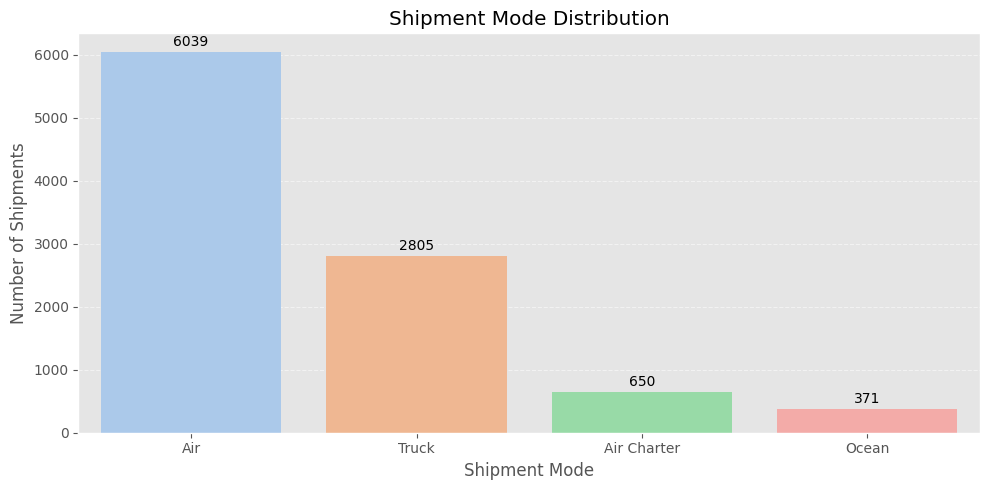

In [ ]:
# Chart - 1 visualization code
# Plot: Count of shipments by shipment mode
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Shipment Mode', order=df['Shipment Mode'].value_counts().index, palette='pastel')

# Add labels on bars
for i, count in enumerate(df['Shipment Mode'].value_counts()):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
# Add titles and Labels
plt.title('Shipment Mode Distribution')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Shipments')
# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A countplot is ideal to show the frequency of categories—here it visualizes how shipments are distributed across different modes (Air, Sea, Truck).

##### 2. What is/are the insight(s) found from the chart?

Air is the most used mode of transport, followed by Sea and Truck.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**
It helps logistics teams understand mode dependency and plan for cost optimization and risk balancing.

**Negative Impact-**
Over-dependence on Air (most expensive mode) may be increasing overall freight cost. This could lead to inefficiency if not balanced with cheaper alternatives.



#### Chart - 2 - Delivery Status Distribution

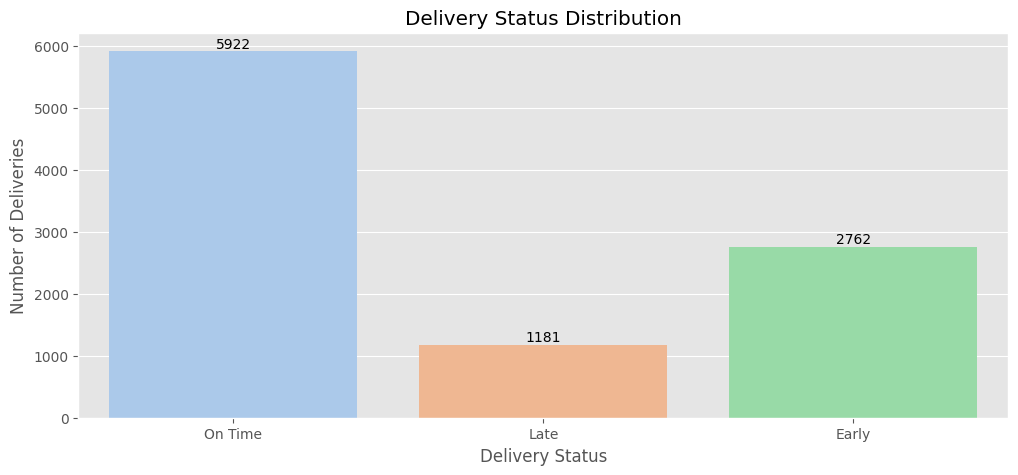

In [ ]:
# Chart - 2 visualization code
# Count plot for Delivery Status with properly aligned data labels
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, x='Delivery Status', palette='pastel')

# Add count labels centered on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Deliveries')

plt.show()


##### 1. Why did you pick the specific chart?

To visualize how well the shipments perform against their scheduled delivery dates—whether they arrive early, on time, or late.

##### 2. What is/are the insight(s) found from the chart?

Most shipments are delivered early, with fewer being late or exactly on time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
It shows reliability in early shipments but also hints at inefficient scheduling or planning practices.

**Negative Impact -**
Frequent early deliveries may mean underutilized inventory time, potentially leading to warehousing issues or resource mismatch.

#### Chart - 3 - Top 10 Countries by Shipment Count

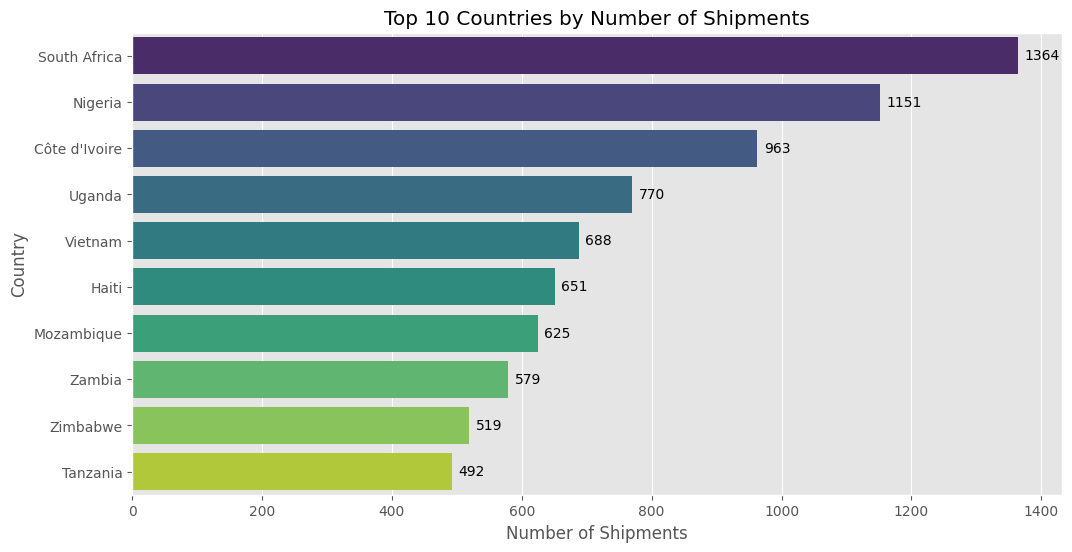

In [ ]:
# Chart - 3 visualization code
# Barplot for Top 10 Countries by Shipment Count
plt.figure(figsize=(12, 6))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

# Add count labels
for i, v in enumerate(top_countries.values):
    plt.text(v + 10, i, str(v), va='center')

plt.title('Top 10 Countries by Number of Shipments')
plt.xlabel('Number of Shipments')
plt.ylabel('Country')

plt.show()


##### 1. Why did you pick the specific chart?

To identify which countries receive the most shipments, helping to locate key operational zones.

##### 2. What is/are the insight(s) found from the chart?

Certain countries (South Africa & Nigeria) have significantly higher shipment counts, showing regional demand concentration.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
It enables resource allocation based on demand, optimizing supply chain efforts in top-performing countries.

**Negative Impact -**
If resources are overly allocated to a few countries, other regions may face service delays or inefficiencies.

#### Chart - 4 - Shipment Mode vs Freight Cost

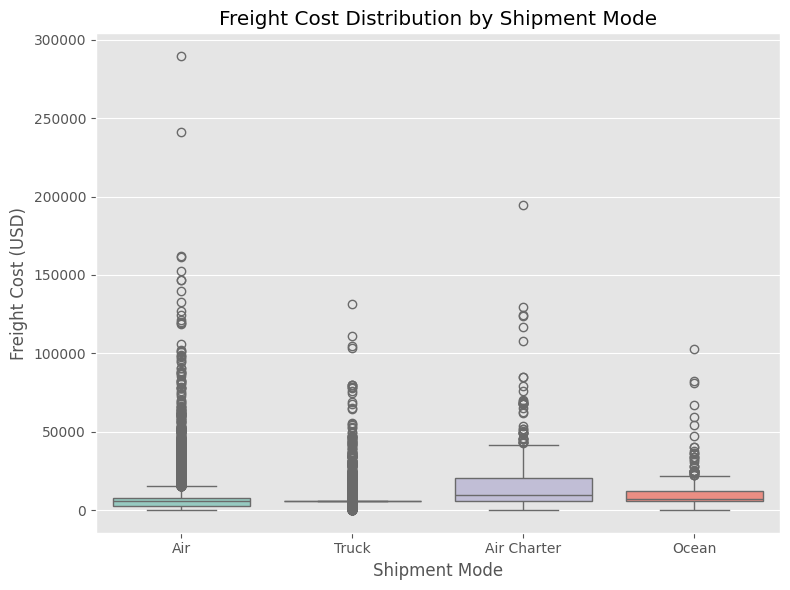

In [ ]:
# Chart - 4 visualization code
# Bivariate Analysis – 1: Shipment Mode vs. Freight Cost (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Shipment Mode', y='Freight Cost (USD)', palette='Set3')

plt.title('Freight Cost Distribution by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Freight Cost (USD)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot helps visualize the distribution and outliers of freight cost across shipment modes.

##### 2. What is/are the insight(s) found from the chart?

Air shipments have the highest freight cost and wide variability; Truck and Sea tend to be cheaper.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
It helps in decision-making to choose cost-effective shipment methods.

**Negative Impact -**
If over-reliant on air shipments, costs might spiral unnecessarily.



#### Chart - 5 - Delivery Status vs. Freight Cost

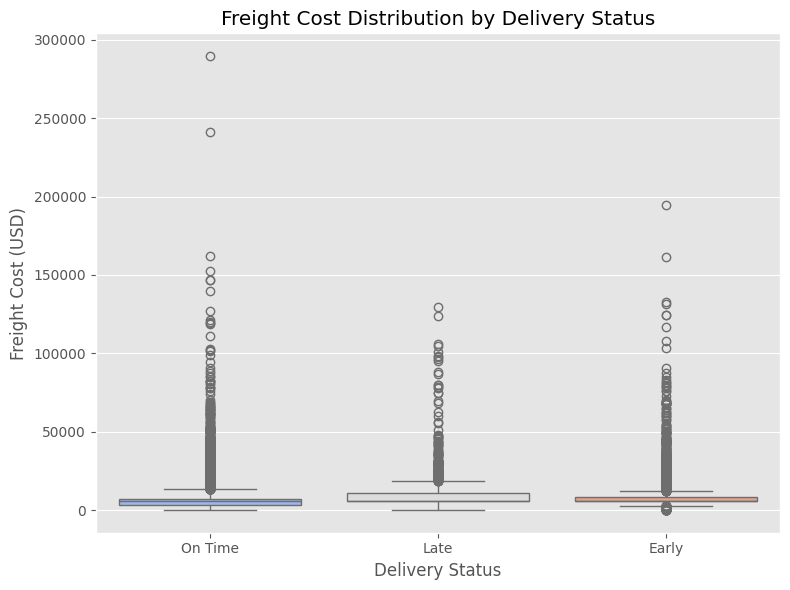

In [ ]:
# Chart - 5 visualization code
# Boxplot to show how freight costs vary based on delivery status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Delivery Status', y='Freight Cost (USD)', palette='coolwarm')

plt.title('Freight Cost Distribution by Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Freight Cost (USD)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see if delivery timeliness affects the freight cost.

##### 2. What is/are the insight(s) found from the chart?

Late deliveries tend to have slightly higher freight costs on average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Controlling late deliveries can also help reduce shipping costs.



#### Chart - 6 - Line Item Quantity vs. Freight Cost

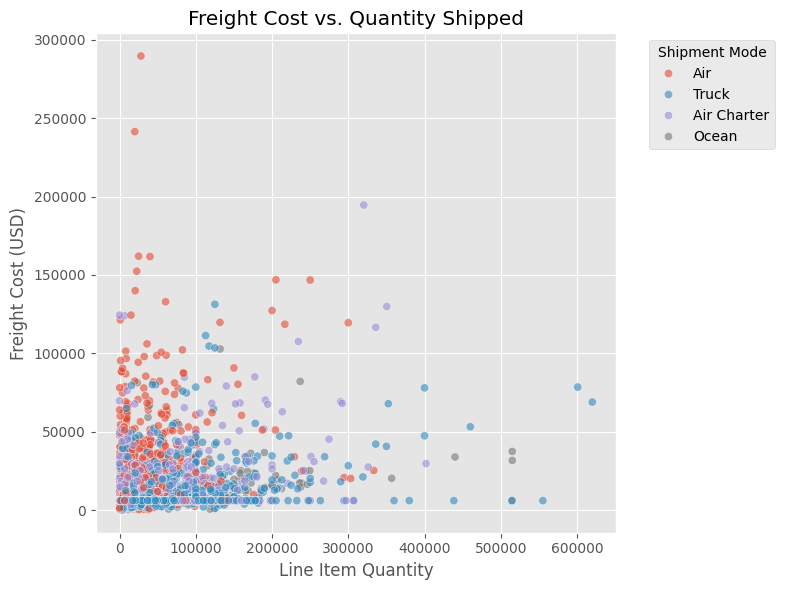

In [ ]:
# Chart - 6 visualization code
# Scatter plot to show relationship between quantity and freight cost
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Line Item Quantity', y='Freight Cost (USD)', hue='Shipment Mode', alpha=0.6)

plt.title('Freight Cost vs. Quantity Shipped')
plt.xlabel('Line Item Quantity')
plt.ylabel('Freight Cost (USD)')
plt.legend(title='Shipment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To explore whether the quantity of items affects freight cost and how shipment mode interacts with it.

##### 2. What is/are the insight(s) found from the chart?

A general upward trend is seen; higher quantities typically lead to higher freight cost, especially for Air.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
It can help logistics and procurement teams budget shipping more accurately.

#### Chart - 7 - Weight Distribution of Shipments

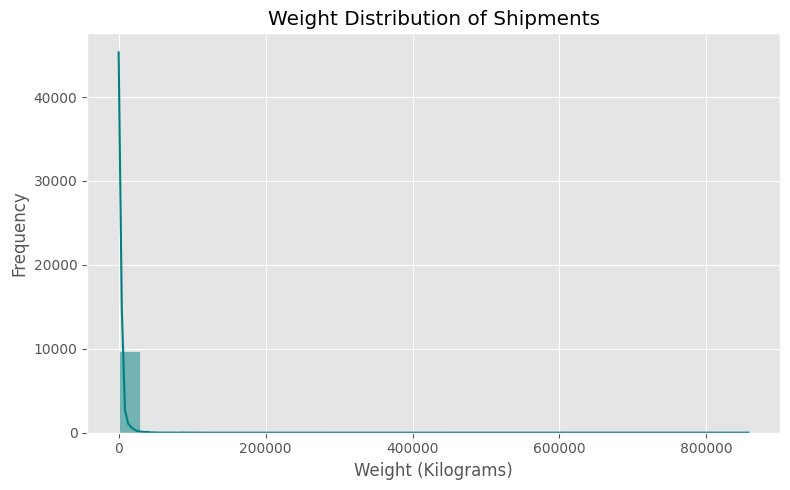

In [ ]:
# Chart - 7 visualization code
# Histogram for Weight Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight (Kilograms)'], bins=30, kde=True, color='teal')

plt.title('Weight Distribution of Shipments')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To analyze the typical weight range of shipments.

##### 2. What is/are the insight(s) found from the chart?

Most shipments fall under a specific weight range; some are outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Useful for determining packaging, shipment planning, and freight charges.

#### Chart - 8 - Shipment Mode vs Delivery Status

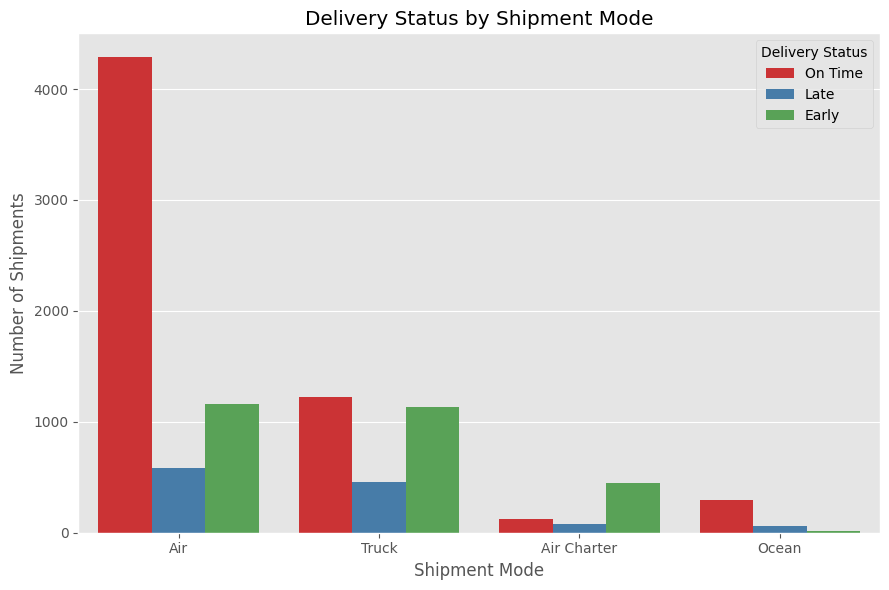

In [ ]:
# Chart - 8 visualization code
# Grouped barplot for Shipment Mode vs Delivery Status
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=df, x='Shipment Mode', hue='Delivery Status', palette='Set1')

plt.title('Delivery Status by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Shipments')
plt.legend(title='Delivery Status', loc='upper right')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To explore whether shipment mode impacts delivery timeliness.

##### 2. What is/are the insight(s) found from the chart?

Late deliveries are more frequent in some shipment modes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Can help optimize choice of shipment mode to improve timeliness.

#### Chart - 9 - Vendor vs Total Shipments (Top 10 Vendors)

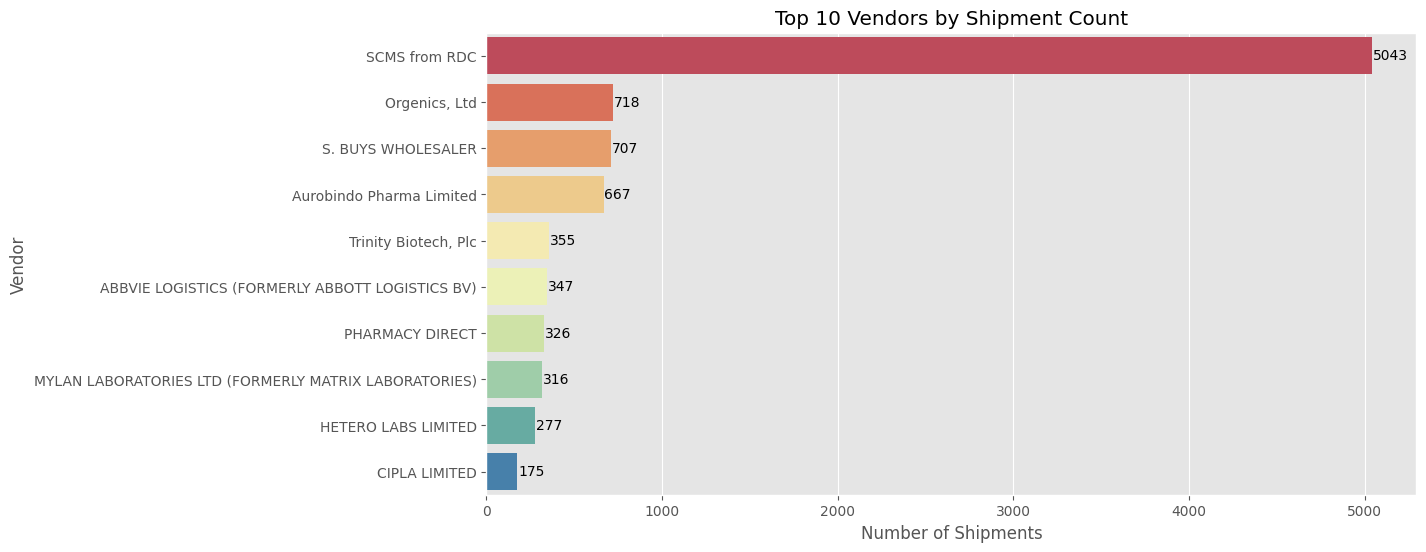

In [ ]:
# Chart - 9 visualization code
# Top 10 vendors by shipment count
top_vendors = df['Vendor'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='Spectral')

# Add data labels
for i, v in enumerate(top_vendors.values):
    plt.text(v + 5, i, str(v), va='center')

plt.title('Top 10 Vendors by Shipment Count')
plt.xlabel('Number of Shipments')
plt.ylabel('Vendor')

plt.show()


##### 1. Why did you pick the specific chart?

To identify vendors that handle the most shipments.

##### 2. What is/are the insight(s) found from the chart?

A few vendors such as SCMS from RDC are responsible for most shipments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Critical for supplier relationship management and performance evaluation.

#### Chart - 10 - Line Item Quantity Distribution


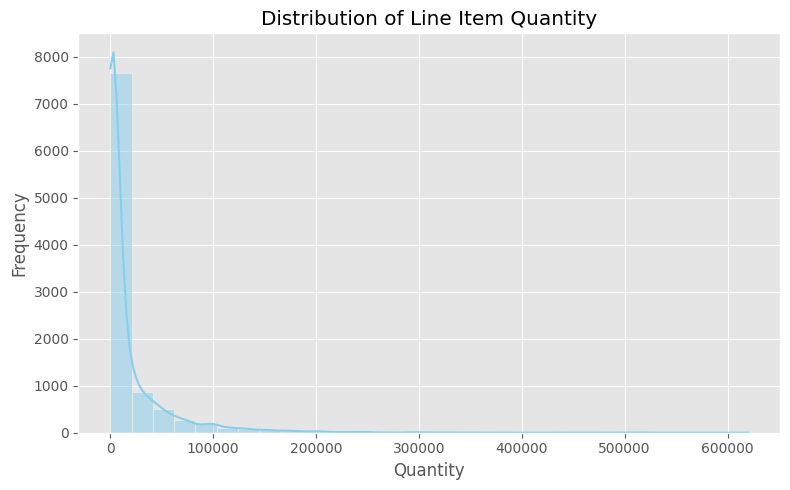

In [ ]:
# Chart - 10 visualization code
# Distribution of Line Item Quantity
plt.figure(figsize=(8, 5))
sns.histplot(df['Line Item Quantity'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Line Item Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To analyze how frequently various order quantities are shipped.

##### 2. What is/are the insight(s) found from the chart?

Most shipments have small-to-medium quantities, large orders are less frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Helps in inventory forecasting and packaging optimization.

#### Chart - 11 - Delivery Delay (Days) by Shipment Mode



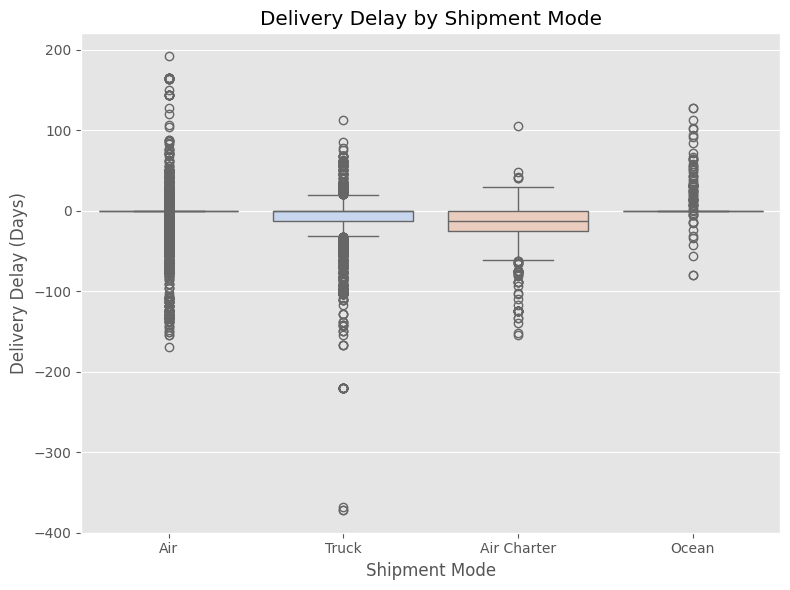

In [ ]:
# Chart - 11 visualization code
# Boxplot showing Delivery Delay by Shipment Mode
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Shipment Mode', y='Delivery Delay (Days)', palette='coolwarm')

plt.title('Delivery Delay by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Delivery Delay (Days)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To examine how delivery delay varies with different shipment methods.

##### 2. What is/are the insight(s) found from the chart?

Air shipments generally have smaller delivery delays compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Aids decision-making on shipment choices to reduce delays and cost trade-offs.

#### Chart - 12 - Country vs Average Delivery Delay

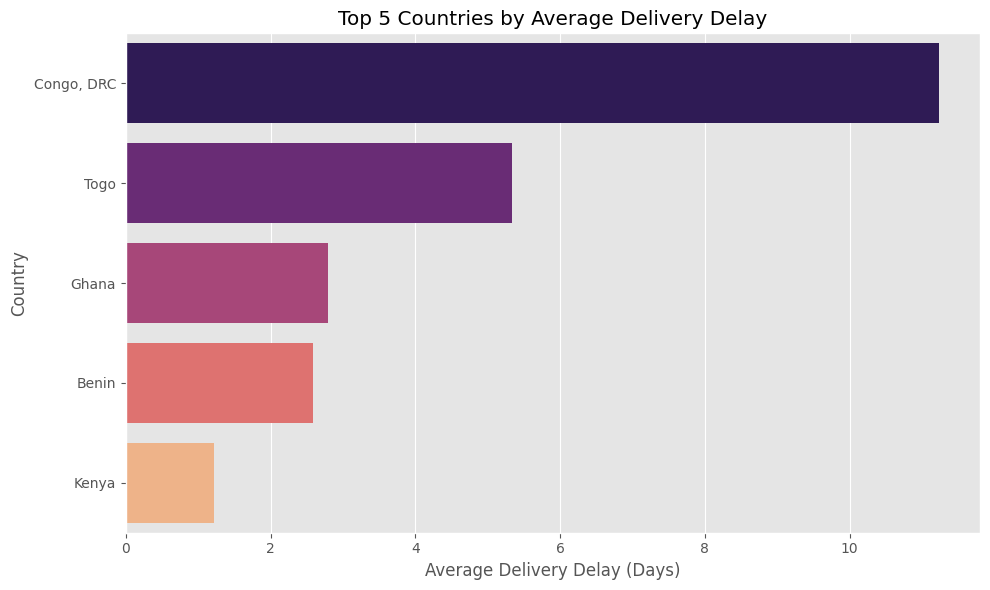

In [ ]:
# Chart - 12 visualization code
# Barplot for Average Delivery Delay by Country (Top 10 Countries)
avg_delay = df.groupby('Country')['Delivery Delay (Days)'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_delay.values, y=avg_delay.index, palette='magma')

plt.title('Top 5 Countries by Average Delivery Delay')
plt.xlabel('Average Delivery Delay (Days)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To identify countries experiencing the longest delays.

##### 2. What is/are the insight(s) found from the chart?

Some countries such as Congo, DRC & Togo consistently face higher average delays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact -**
Reveals regions needing better logistics or vendor coordination.

#### Chart - 13 - Freight Cost vs Weight (Kilograms)

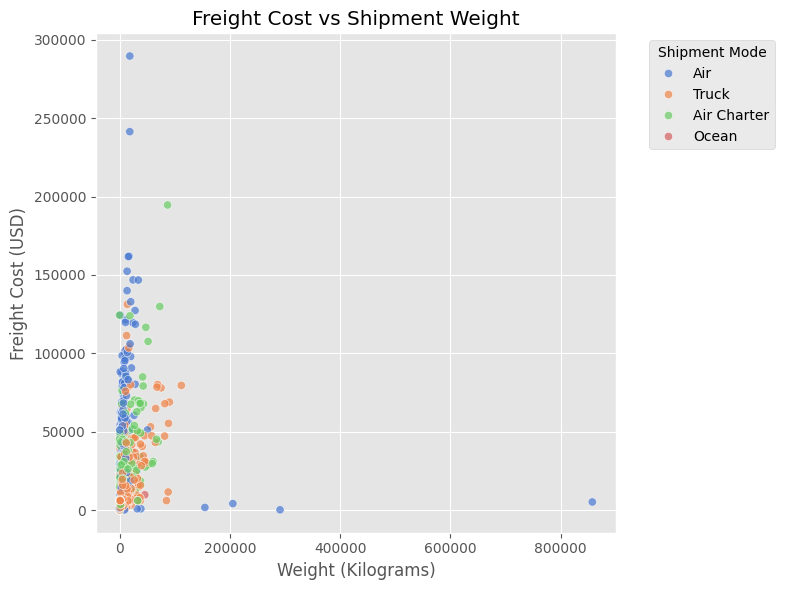

In [ ]:
# Chart - 13 visualization code
# Scatterplot for Freight Cost vs Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Weight (Kilograms)', y='Freight Cost (USD)', hue='Shipment Mode', palette='muted', alpha=0.7)

plt.title('Freight Cost vs Shipment Weight')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Freight Cost (USD)')
plt.legend(title='Shipment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To understand if heavier shipments result in higher freight costs and how modes affect this.

##### 2. What is/are the insight(s) found from the chart?

Freight cost generally increases with weight, but outliers exist based on shipment mode.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for pricing strategy and cost optimization in logistics.

#### Chart - 14 - Correlation Heatmap

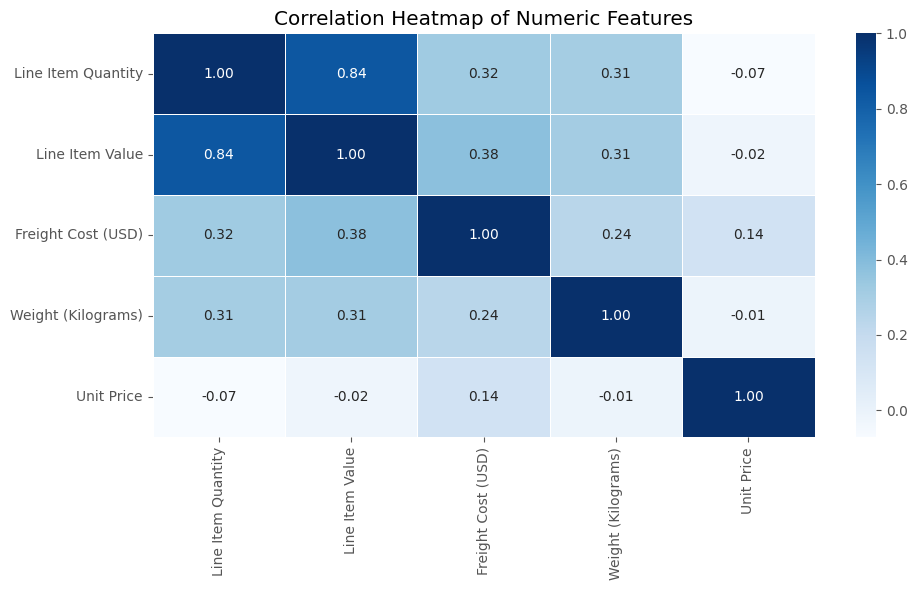

In [ ]:
# Correlation Heatmap visualization code
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
corr = df[['Line Item Quantity', 'Line Item Value', 'Freight Cost (USD)', 'Weight (Kilograms)', 'Unit Price']].corr()

sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To understand relationships among key numerical features.

##### 2. What is/are the insight(s) found from the chart?

Strong correlation between Line Item Quantity and Line Item Value.

#### Chart - 15 - Pair Plot

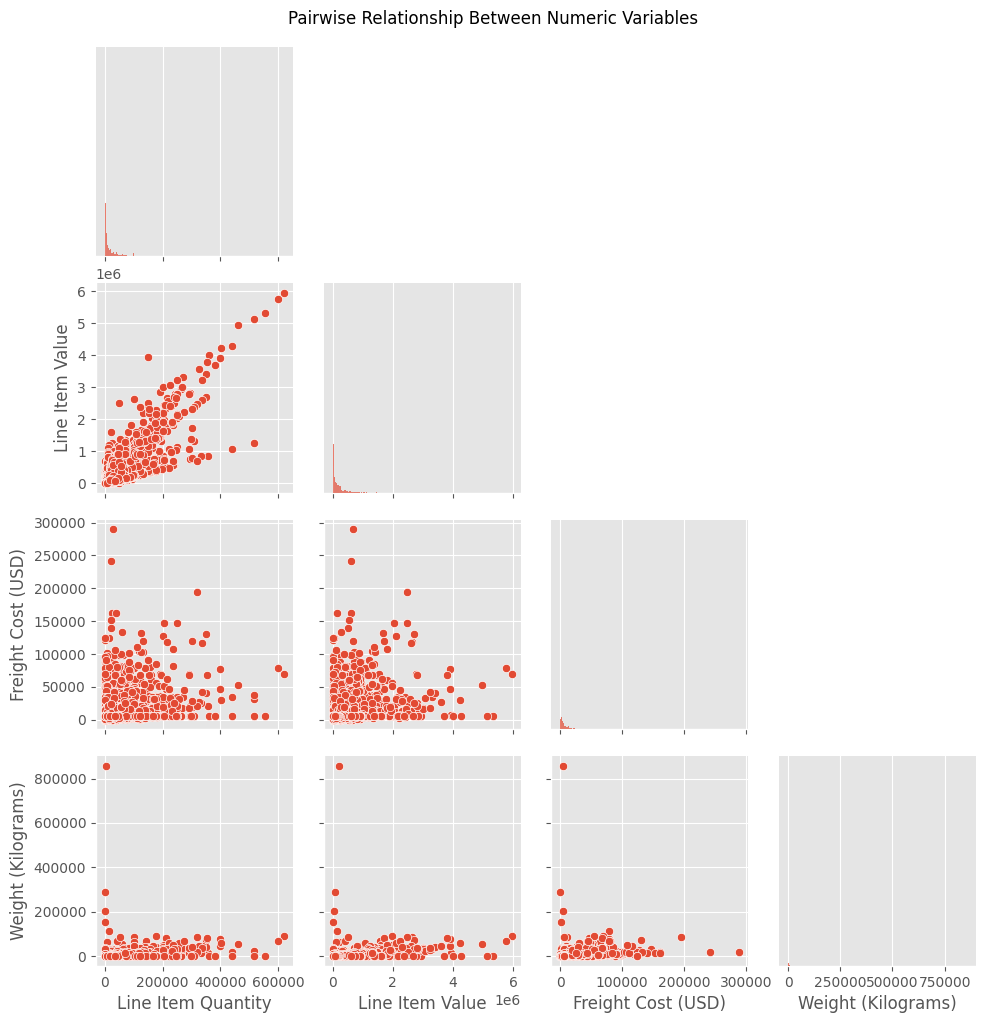

In [ ]:
# Pair Plot visualization code
# Pairplot for major numerical variables
sns.pairplot(df[['Line Item Quantity', 'Line Item Value', 'Freight Cost (USD)', 'Weight (Kilograms)']], corner=True)
plt.suptitle('Pairwise Relationship Between Numeric Variables', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

To visually observe scatter patterns and distributions across all combinations.

##### 2. What is/are the insight(s) found from the chart?

Most relationships are positively correlated, Line Item Quantity and Weight are tightly coupled.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve timely and cost-efficient deliveries, I recommend the client:

1. **Improve Delay-Prone Routes:** Focus on countries with high average delays. Work with logistics partners to streamline processes in these regions.

2. **Optimize Shipment Mode Selection:** Since air is frequently used, explore if switching to more cost-effective modes like sea freight is possible without risking delivery timelines.

3. **Monitor Vendor Performance:** Vendors contributing to delays or high freight costs should be tracked. Prioritize partnerships with reliable vendors.

4. **Reduce Negative Freight-Cost Outliers:** Review orders where freight cost far exceeds item value to eliminate inefficiencies.

5. **Use INCO Term Analysis:** Choose Vendor INCO terms that are associated with more on-time deliveries to minimize delays caused by customs or vendor responsibilities.

6. **Automate Tracking:** Introduce systems that can monitor delivery status and delays in real time, reducing dependency on manual updates.

By acting on these insights, FedEx can reduce delays, cut costs, and improve customer satisfaction—driving better operational efficiency and long-term growth.

# **Conclusion**

The EDA of FedEx's delivery data uncovered key insights into shipment efficiency, cost, and vendor performance. A large number of deliveries were delayed, with country-wise variation, shipment mode choice, and vendor INCO terms playing a major role.

Air shipments, though commonly used, showed high costs and inconsistent delivery timelines. Certain countries experienced frequent delays, and some vendors consistently underperformed.

We also observed that freight cost often scales with item value, but outliers highlight potential inefficiencies. A high count of first-line priority items further stresses the need for timely logistics.

To improve performance, FedEx should optimize vendor partnerships, review costly freight outliers, and choose reliable INCO terms and shipping methods. These steps can reduce delays, control costs, and improve customer satisfaction.